# CISCO Post Scraper And Preliminary Analysation

#### LOADING DEPENDENCIES

In [1]:
import requests
import bs4

##### class post_info


Creating post_info class which bundles all relevant info to a post


In [2]:
class post_info:
    def __init__(self,post,date,views,upvotes,replies,link,resolved):
        self.post = post
        self.date = date
        self.upvotes = int(upvotes)
        self.replies = int(replies)
        self.views = int(views)
        self.link = link
        self.resolved = resolved
        
    def disp_info(self):
        print("\n\nPost : " +self.post+"\nDate : "+self.date+ "\nReplies : "+str(self.replies) +"\t\t views : "+str(self.views)+"\t\t upvotes :"+str(self.upvotes )+"\t\t resolved : "+str(self.resolved)+"\nLink : "+self.link)


#### SCRAPING HELPER FUNCTIONS

##### load_page(url)

Thisfunction loads all the post in the page of given "url" and returns a list of post_info class object

parameter(s) :
    url : page link

In [3]:
def load_page(url):
    res = requests.get(url)
    soup = bs4.BeautifulSoup(res.text,'lxml')
    
    posts = []
    
    raw_replies = (soup.select("div.lia-quilt-column-alley-left tr.lia-list-row div.lia-component-messages-column-thread-replies-count span"))
    n_rep = len(raw_replies)
    
    replies = []
    for reply in raw_replies:
        replies.append(reply.getText())
        
        
    raw_views = soup.select("div.lia-quilt-column-alley-left tr.lia-list-row div.lia-component-messages-column-topic-views-count span")
    n_views = len(raw_views)
    
    views = []
    for view in raw_views:
        views.append(view.getText())
        
        
    raw_dates = (soup.select("div.lia-quilt-column-alley-left tr.lia-list-row div.lia-info-area > span:nth-of-type(1) span.local-date"))
    n_dates = len(raw_dates)
    
    dates = []
    for date in raw_dates:
        dates.append(date.getText()[1:])
        
    
    raw_titles = (soup.select("div.lia-quilt-column-alley-left tr.lia-list-row div.MessageSubject a.lia-custom-event.lia-link-navigation.page-link"))
    n_titles = len(raw_titles)
    
    titles = []
    for title in raw_titles:
        _t = title.getText().split()
        titles.append(" ".join(_t))
    
    
    raw_upvotes = soup.select("div.lia-quilt-column-alley-left tr.lia-list-row div.custom-grid-kudos span")
    n_upvotes = len(raw_upvotes)
    
    upvotes = []
    for upvote in raw_upvotes:
        upvotes.append(upvote.getText()[4:-3])
        
    links_html = soup.select('div.lia-quilt-column-alley-left tr.lia-list-row a.page-link.lia-link-navigation.lia-custom-event')
    n_links = len(links_html)
    
    links = []
    for link in links_html:
        links.append('https://supportforums.cisco.com/'+link.attrs["href"])
    
    trs = soup.select('div.lia-quilt-column-alley-left tbody tr')
    n_res = len(trs)
    
    resolved = []
    for tr in trs:
        resolved.append(len(tr.find_all("td",{"aria-label" : "This thread is solved"})))
    
    
        
    if n_rep == n_upvotes == n_titles == n_dates == n_views == n_res:
        
        print("number of posts : "+str(n_rep))
        
        for i in range(n_titles):
            posts.append(post_info(titles[i],dates[i],views[i],upvotes[i],replies[i],links[i],resolved[i]))
        
        return posts
    
    else:
        
        print("error encountered : unequal data contraints")
        
        print("number of replies : "+str(n_rep))
        print("number of views " + str(n_views))
        print("number of upvotes " +str(n_upvotes))
        print("number of dates " +str(n_dates))
        print("number of titles "+str(n_titles))
        
        return None

##### load_topic(base_url, num_pages, start_page = 50,sep_pages = False, display = False)


This function loads pages from a particular topics base url


parameters : 


    base_url : base url of given topic
    
    num_pages : number of pages to be loaded
    
    start_page : starting page number for scraping
    
    sep_pages : if True returns list of list of page posts
    
    display : Set true to display results after completion

In [4]:
def load_topic(base_url, num_pages, start_page = 50,sep_pages = False, display = False):
    
    all_posts = []
    sep_posts = []
    
    for i in range(num_pages):
        
        load_url = base_url + str(start_page+i)
        page_posts = load_page(load_url)
        
        sep_posts.append(page_posts)
        all_posts.extend(page_posts)
        
        if page_posts != None:
            print("page number : "+str(start_page+i) + " loaded successfully")
        else:
            print("page number : "+str(start_page+i) + " load error")
            return all_posts
        
    if display:
        for i in range(len(all_posts)):
            all_posts[i].disp_info()
            
    if sep_pages :
        return sep_posts
    else:
        return all_posts
        

In [22]:
base_url = 'https://supportforums.cisco.com/t5/lan-switching-and-routing/bd-p/6016-discussions-lan-switching-routing/page/'
posts = load_topic(base_url, num_pages = 100, start_page = 650,sep_pages = False, display = False )

number of posts : 15
page number : 650 loaded successfully
number of posts : 15
page number : 651 loaded successfully
number of posts : 15
page number : 652 loaded successfully
number of posts : 15
page number : 653 loaded successfully
number of posts : 15
page number : 654 loaded successfully
number of posts : 15
page number : 655 loaded successfully
number of posts : 15
page number : 656 loaded successfully
number of posts : 15
page number : 657 loaded successfully
number of posts : 15
page number : 658 loaded successfully
number of posts : 15
page number : 659 loaded successfully
number of posts : 15
page number : 660 loaded successfully
number of posts : 15
page number : 661 loaded successfully
number of posts : 15
page number : 662 loaded successfully
number of posts : 15
page number : 663 loaded successfully
number of posts : 15
page number : 664 loaded successfully
number of posts : 15
page number : 665 loaded successfully
number of posts : 15
page number : 666 loaded successful

In [23]:
print(len(posts))

1500


In [24]:
posts[0].disp_info()



Post : Carry two vlans on a switchport
Date : 02-21-2017
Replies : 5		 views : 101		 upvotes :0		 resolved : 1
Link : https://supportforums.cisco.com//t5/lan-switching-and-routing/carry-two-vlans-on-a-switchport/td-p/3035905


In [25]:
import string
def save_csv(posts,filename):
    
    csv = open(filename, "w",encoding='utf-8')
    columnTitleRow = "Post,Date,Views,Replies,Upvotes,Link,Resolved\n"
    csv.write(columnTitleRow)
    table = str.maketrans({key: None for key in string.punctuation})
    
    for post in posts:
        post_string = post.post.translate(table) 
        row = post_string + "," + post.date + "," + str(post.views) + "," + str(post.replies) + "," + str(post.upvotes) + "," +post.link+"," + str(post.resolved)+ "\n"
        csv.write(row)
        

In [26]:
save_csv(posts,"posts2.csv")

In [27]:
import pandas as pd
data = pd.read_csv("LAN_Switching_Routing_info.csv",parse_dates=['Date'])

print(len(data))
data.head(15)

10500


,Post,Date,Views,Replies,Upvotes,Link,Resolved
0,IOS Upgrade on cisco WSC6509E switche,2018-05-23,83,1,0,https://supportforums.cisco.com//t5/lan-switch...,0
1,C68008P10G Interface Module Installat,2018-05-23,141,6,0,https://supportforums.cisco.com//t5/lan-switch...,1
2,Cisco ACI mode vs NXOS Mode,2018-05-22,217,3,0,https://supportforums.cisco.com//t5/lan-switch...,1
3,Visio stencil CISCO 892FSP,2016-11-14,586,4,0,https://supportforums.cisco.com//t5/lan-switch...,0
4,Problem with a simple route,2018-05-22,129,5,10,https://supportforums.cisco.com//t5/lan-switch...,0
5,Authorization failed on Routers for a,2018-05-22,119,9,0,https://supportforums.cisco.com//t5/lan-switch...,0
6,cisco catalyst 3850 license downgrade,2018-05-22,146,1,0,https://supportforums.cisco.com//t5/lan-switch...,1
7,SNMP community with nonexisting ACL,2018-05-22,139,2,0,https://supportforums.cisco.com//t5/lan-switch...,1
8,Dropping 6th ICMP packets,2011-04-25,10455,9,10,https://supportforums.cisco.com//t5/lan-switch...,1
9,problem enable ssh switch C4500X16FP,2018-05-22,109,5,5,https://supportforums.cisco.com//t5/lan-switch...,0


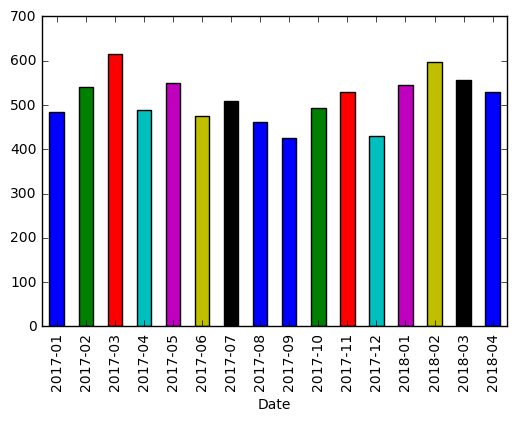

In [28]:
filtered_data = data[(data['Date'] > '2017-01-01') & (data['Date'] < '2018-05-01')]
monthly_hits = filtered_data['Date'].groupby(filtered_data.Date.dt.to_period("M")).agg('count')
monthly_hits.plot.bar()

## RETRIEVING POST DATA


A post_data class object stores post attributes such as heading , content and replies bundled together.


In [40]:
class post_data:
    def __init__(self,heading,content,replies):
        self.heading = heading
        self.content = content
        self.replies = replies
        
    def disp_info(self):
        print("HEADING :\t"+self.heading)
        print("\n\nPOST :\n\n"+self.content)
        print("\nREPLIES :\t")
        if len(self.replies):
            for reply in self.replies:
                print("\n\n"+reply)
        else:
            print("No Replies!")
        

##### scrape_post_data(load_url,display = False)

this function extract post info by going to post page.

parameters:

    load_url: link to post discussion page.
    
    display: set to True to display posts while scraping.

In [41]:
def scrape_post_data(load_url,display = False):
    res = requests.get(load_url)
    soup = bs4.BeautifulSoup(res.text,'lxml')
    
    heading = soup.select("div.lia-thread-topic h5")[0].getText()
    
    paras = soup.select("div.lia-thread-topic p")
    content = ""
    for para in paras:
        content += (para.getText())
    content = content.split()
    content = " ".join(content)
    
    replies_html = soup.select("div.lia-thread-reply div.lia-message-body")
    replies = []
    for reply in replies_html:
        reply = reply.getText().split()
        reply = " ".join(reply)
        replies.append(reply)
        
    post = post_data(heading,content,replies) 
        
    if display:
        post.disp_info()
            
    return post     
                

##### post_data_loader(data,num_pages=3,start_page=0) 

This function loads post data by calling scrape_post_data() function .

paramenters:
    
    data: pandas dataframe containing info about post references .
    
    num_pages : number of pages whose post data you want to scrape.
    
    start_page : the page you want the scraping to start with.
   
    NOTE: each page contains 15 posts so while choosing number of pages be careful about the number of links that you scrape 
    because if it is too big then it may cause timeouterror.

In [42]:
def post_data_loader(data,num_pages=3,start_page=0):
    if((num_pages+start_page)*15 <= len(data)):
        links = data['Link'].tolist()[start_page*15:(num_pages+start_page)*15]
        post_dat = []
        for i,link in enumerate(links):
            post_dat.append(scrape_post_data(link))
            if(i%5 == 0):
                print("Post : "+str(i)+" loaded")
        return post_dat
    else:
        print("Invalid Inputs")

In [43]:
post_dat = post_data_loader(data,1,0)

Post : 0 loaded
Post : 5 loaded
Post : 10 loaded


In [44]:
post_dat[8].disp_info()

HEADING :	Firmware not using default in the CUCM


POST :

What could be the cause if a phone is not using the default firmware specified on the CUCM ?At the phone page itself , the Phone load Name is not specified anything ? if firmware not the same as default, the time between phone & CUCM is not synchronize, is it possible ? Solved! Go to Solution.

REPLIES :	


problem resolved what i do is perform soft reset on the phone and manually put the default firmware on the phone load name


Hi Mohd,There could be several reasons for that. Have you tried deleting ITL file on the phone once.Could you tell us what is the current firmware on the phone and what is the default firmware specified in CUCM ?HTHRajanPls rate all useful posts by clicking the star below


haven't tried anything, actually this particular user using this phone said that the time is not sync.upon checking, i realize the firmware is not the same as other phone default = SCCP42.9-4-2SR3-1S this phone = SCCP42.9-4-2SR2-2S


In [79]:
import string
def save_post_data(posts,filename):
    
    csv = open(filename, "w",encoding='utf-8')
    columnTitleRow = "Heading,Content,Replies\n"
    csv.write(columnTitleRow)
    table = str.maketrans({key: None for key in string.punctuation})
    
    for post in posts:
        heading = post.heading.translate(table) 
        content = post.content.translate(table)
        replies = str(post.replies).translate(table)
        row = heading + "," + content + "," + replies+ "\n"
        csv.write(row)
        

In [80]:
save_post_data(post_dat,"post_data.csv")

In [81]:
post_data = pd.read_csv("post_data.csv")

print(len(post_data))
post_data.head(10)

15


,Heading,Content,Replies
0,zone based firewall,Good afternoonWe are going to deploy on our bo...,NaN
1,IP Camera not working over wireless P2P Link,HiMy office main building and backup site is c...,Hello my first thought is how are both 3560 sw...
2,DNA,NaN,Use Digital Network Architecture DNA to sense ...
3,CCIE RS,Dear Brothers Could you please share with me t...,hiyoure questions are more appropriate in the ...
4,Cisco Catalyst 950040X Fans Included or not,I am trying to quote a Cisco Catalyst 950040XA...,See table15 in this link The chassis comes wit...
5,CPU,Hi I have a 4506 switch running cat4500eunive...,Hi It could be a bug an upgrade could be requi...
6,licence,Can any one help me to know what is the below ...,Hello could be related to smart licensing do y...
7,Connect VLANs from 2 switches via a router,Hi everyone as in the project attached I want ...,Hello this looks like a Packet Tracer project ...
8,VLAN ADD,Can anybody guide please what are the steps ne...,Hi Waqas I believe you need to add 2 more new ...
9,SFF84725THRESHOLDVIOLATION Gi02 Rx power high ...,Hi Guys we are reciving this kind of logs into...,NaN


In [46]:
post_dat

In [47]:
import pickle

def save_post_data(post_dat,filename,new_file = False,append = True):
    posts = []
    if not new_file and append :
        f = open(filename, "rb")
        posts = pickle.load(f)
        f.close()
    f = open(filename, "wb")
    #post_dat.extend(posts)
    pickle.dump(post_dat,f,pickle.HIGHEST_PROTOCOL)
    f.close()
    return post_dat
    
def load_post_data(filename):
    f = open(filename, "rb")
    posts1 = pickle.load(f)
    f.close()
    return posts1
    

In [55]:
save_post_data(post_dat,"post_data1.pkl",new_file = False,append = True)
post_dat = load_post_data("post_data1.pkl")


In [174]:
#post_dat

### Premilinary Data Analysis for LAN, Switching and Routing

In [84]:
import pandas as pd
data = pd.read_csv("postsLSR10k.csv",parse_dates=['Date'])

print(len(data))
data.head(10)

10050


,Post,Date,Views,Replies,Upvotes
0,2960x port updown when Vivi box in us,2018-05-16,157,2,0
1,best way to configuration switch port,2018-05-17,202,6,5
2,Nexus 3548Block vlan communication whe,2018-05-17,71,2,0
3,ACL confusion,2018-05-17,158,4,0
4,Boot 3750 from tftp,2011-08-04,9238,21,14
5,5K ntp debug help for failing ntp reque,2018-05-17,128,0,0
6,Inter Vlan routing 2960x 2921,2018-05-17,136,0,0
7,ASR 100X Management Interface with HSR,2016-06-06,150,7,0
8,Catalyst 9K OpenFlow support,2018-05-17,119,0,0
9,Gratuitous ARP Problem,2012-03-06,5764,9,0


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
filtered_data = data[(data['Date'] > '2017-01-01') & (data['Date'] < '2018-05-01')]

In [59]:
date_hits = (filtered_data['Date'].value_counts().sort_index())

##### Number of posts Vs. Day
this plot gives an idea of daily traffic on the domain

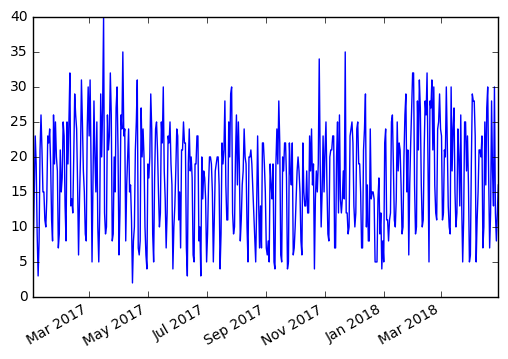

In [60]:
date_hits.plot.line()

this density plot shows that mostly the number of posts made on a day is between 10 to 30

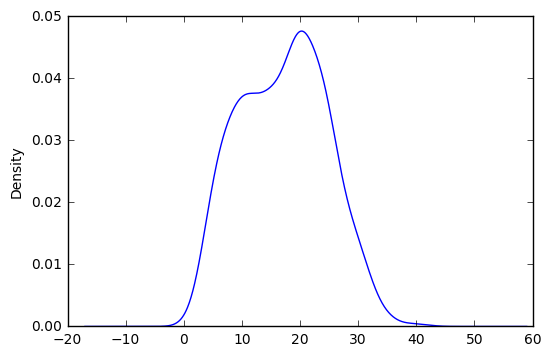

In [75]:
date_hits.plot.density()

#### Monthly Analysis

As from the bar chart shown below it can be seen that the number of posts in each month has low standard deviation and remains fairly constant maybe we can get a better insight of data by analysing the individual post text.

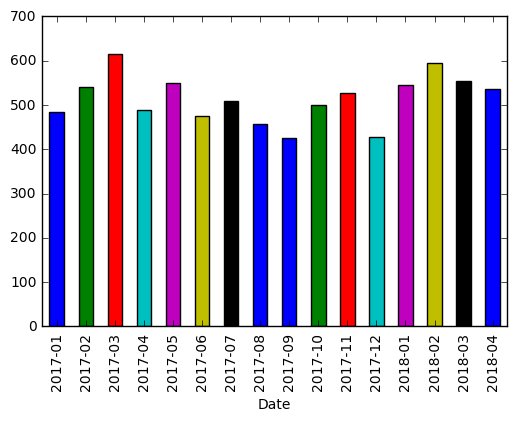

In [61]:
monthly_hits = filtered_data['Date'].groupby(filtered_data.Date.dt.to_period("M")).agg('count')
monthly_hits.plot.bar()

Most months have posts ranging between 450 to 550.

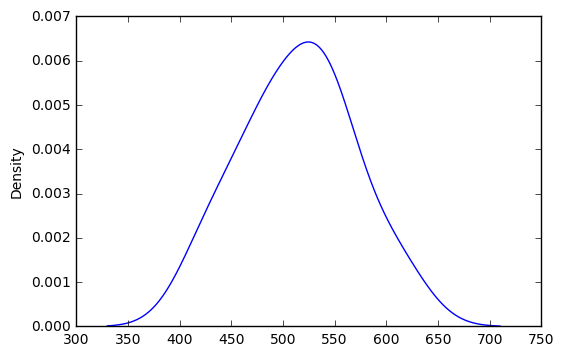

In [62]:
monthly_hits.plot.density()

#### Community Scoring
The activity of any forum is not only based on the number of posts posted but also based on how actively the community participates to solve ones problem.

In [70]:
replied_posts =  data[((data['Replies']) > 0 ) & ( data['Date'] > '2017-01-01') & (data['Date'] < '2018-05-01') ]

In [86]:
print("\nPercentage of posts which have got atleast one reply : {} %\n".format(len(replied_posts)*100//len(filtered_data)))


Percentage of posts which have got atleast one reply : 86 %



In [72]:
upvoted_posts = data[((data['Upvotes']) > 0) &(data['Date'] > '2017-01-01') & (data['Date'] < '2018-05-01')]

In [87]:
print("\nPercentage of posts which have got atleast one reply and marked helpful: {} %\n".format(len(upvoted_posts)*100//len(filtered_data)))


Percentage of posts which have got atleast one reply and marked helpful: 20 %



### Post Text based analysis

In [104]:
import nltk
from nltk.corpus import stopwords
import string
from collections import Counter


stopword_file = open("terrier-stop.txt","r")
t_stop = stopword_file.read().splitlines()

In [105]:
def comment_cleaner(comment):
    
    words = nltk.word_tokenize(comment)
    words = [word.lower() for word in words if word.isalpha()]
    table = str.maketrans('', '', string.punctuation)
    words = [word.translate(table) for word in words]
    words = [word for word in words if word.isalpha()]
    
    word_tags = nltk.pos_tag(words)
    
    #words = [word for word,tag in word_tags if tag in ('NN','JJ','NNP','NNS','NNPS')]
    #words.extend([word[-1] for word,tag in word_tags if tag in ('NNS','NNPS')])
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word in stop_words]
    words = [word for word in words if not word in t_stop]
    # stemming of words
    #lemma = nltk.stem.wordnet.WordNetLemmatizer()
    #words = [lemma.lemmatize(word) for word in words]
        
    #porter = PorterStemmer()
    #words = [porter.stem(word) for word in words]
    cleaned_comment = ' '.join(words)
    
    return cleaned_comment

In [111]:
post_list = filtered_data['Post'].tolist()

In [113]:
#all_posts = " ".join(str(post) for post in post_list)
cleaned_posts = [comment_cleaner(str(post)) for post in post_list]
all_posts = " ".join(cleaned_posts)
all_words = all_posts.split()

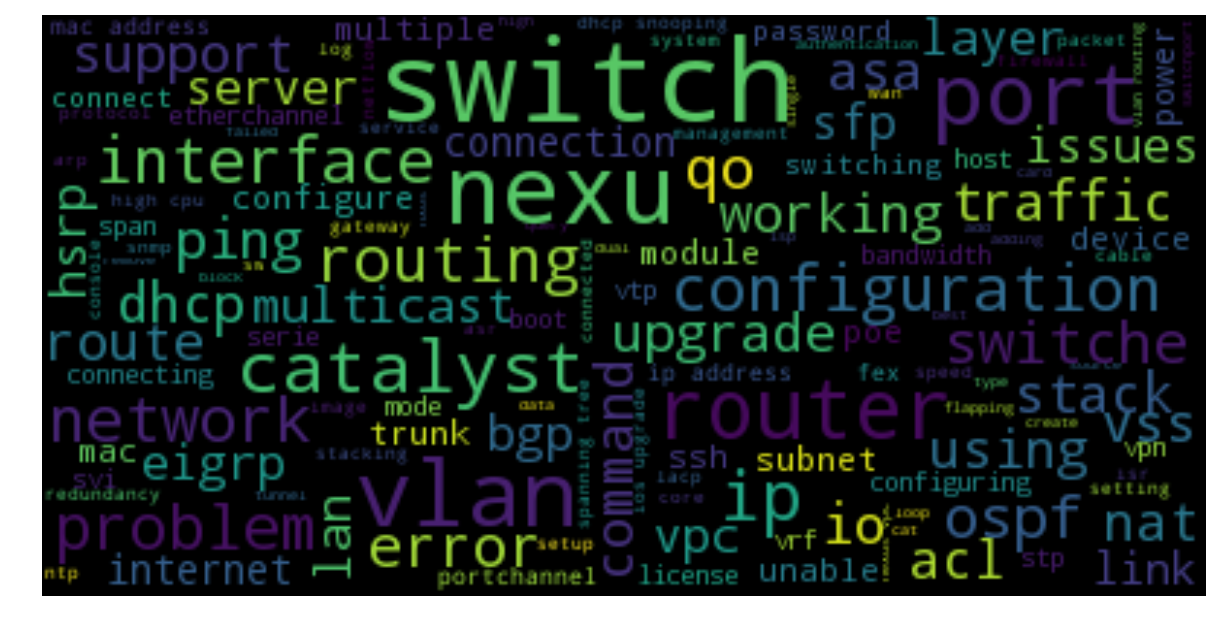

In [117]:
from wordcloud import WordCloud, STOPWORDS
stopwords_w = set(STOPWORDS)


wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords_w,
                          max_words=300,
                          max_font_size=40, 
                          random_state=42
                         ).generate(all_posts)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Premilinary Data Analysis for WAN, Switching and Routing

In [127]:
import pandas as pd
data2 = pd.read_csv("postsWSR5k.csv",parse_dates=['Date'])

print(len(data2))
data2.head(10)

4950


,Post,Date,Views,Replies,Upvotes
0,bgp bgp neighborshio network command,2018-05-08,103,2,5
1,Hub and spoke,2018-05-07,77,2,0
2,adding a switch to a existing switch st,2018-05-07,168,2,0
3,Multiple ISP WAN Load Balancing,2018-05-07,91,2,0
4,Ip nat outside on 2 interfaces,2018-05-08,90,0,0
5,2 interfaces with Nat Outside,2018-05-08,84,0,0
6,Quality of Service dynamic trust stat,2018-05-08,88,0,0
7,How to access another VLAN via my gatew,2018-05-04,132,1,0
8,Download c1140k9w7tar1533JBtar,2018-05-07,144,1,0
9,Policy Based Routing Based on Source an,2016-02-17,386,2,0


In [128]:
filtered_data2 = data2[(data2['Date'] > '2017-01-01') & (data2['Date'] < '2018-05-01')]

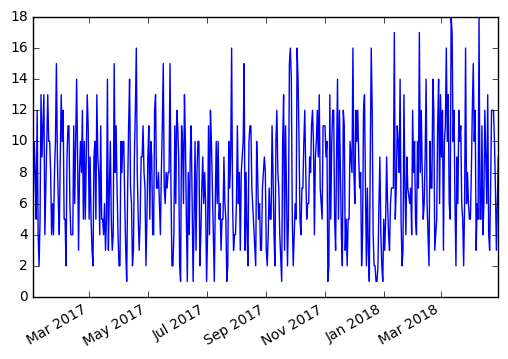

In [132]:
date_hits2 = (filtered_data2['Date'].value_counts().sort_index())
date_hits2.plot.line()

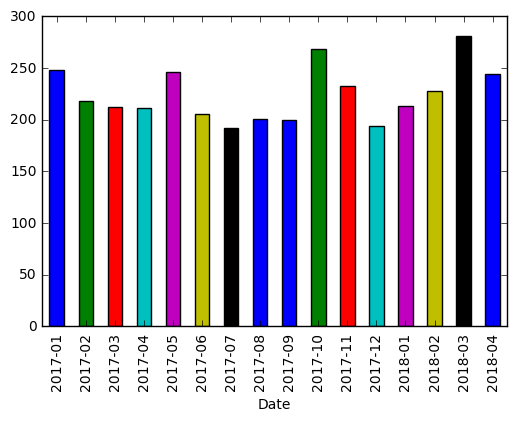

In [135]:
monthly_hits2 = filtered_data2['Date'].groupby(filtered_data2.Date.dt.to_period("M")).agg('count')
monthly_hits2.plot.bar()


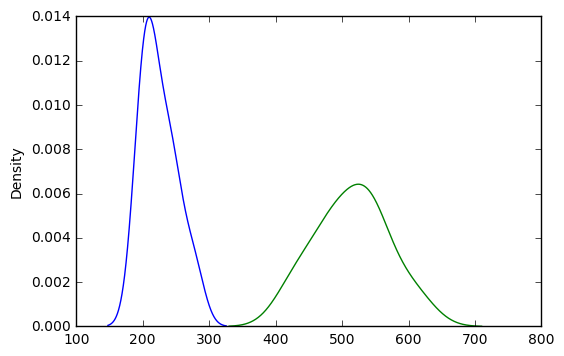

In [133]:
monthly_hits2.plot.density()
monthly_hits.plot.density()

In [137]:
replied_posts2 =  data2[((data2['Replies']) > 0 ) & ( data2['Date'] > '2017-01-01') & (data2['Date'] < '2018-05-01') ]
print("\nPercentage of posts which have got atleast one reply : {} %\n".format(len(replied_posts2)*100//len(filtered_data2)))


Percentage of posts which have got atleast one reply : 86 %



In [139]:
upvoted_posts2 = data2[((data2['Upvotes']) > 0) &(data2['Date'] > '2017-01-01') & (data2['Date'] < '2018-05-01')]
print("\nPercentage of posts which have got atleast one reply and marked helpful: {} %\n".format(len(upvoted_posts2)*100//len(filtered_data2)))


Percentage of posts which have got atleast one reply and marked helpful: 21 %



In [141]:
filtered_data2['Views'].sum()

945381

In [142]:
filtered_data['Views'].sum()

2248001

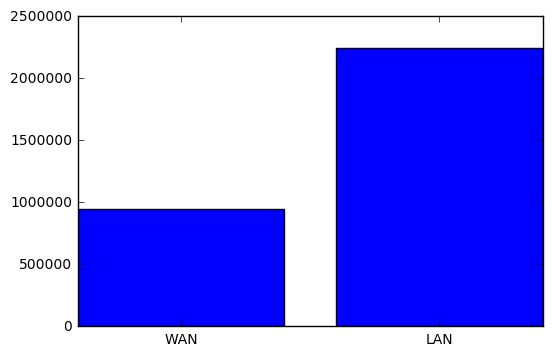

In [164]:
import numpy as np
x = np.arange(2) 
plt.bar(x, height= [filtered_data2['Views'].sum(),filtered_data['Views'].sum()])
plt.xticks(x+0.4, ['WAN','LAN']);

https://chrisalbon.com/python/data_visualization/matplotlib_grouped_bar_plot/
https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot
https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html